In [ ]:
import IPython
import numpy as np
import wave

#Q1]

1] 2]

In [ ]:
mix_1_wave = wave.open('signal_1.wav','r')
mix_2_wave = wave.open('signal_2.wav','r')
mix_3_wave = wave.open('signal_3.wav', 'r')

print(mix_1_wave.getparams())
print(mix_2_wave.getparams())
print(mix_3_wave.getparams())

signal_1_raw = mix_1_wave.readframes(-1)
signal_1 = np.fromstring(signal_1_raw, np.int16)

signal_2_raw = mix_2_wave.readframes(-1)
signal_2 = np.fromstring(signal_2_raw, np.int16)

signal_3_raw = mix_3_wave.readframes(-1)
signal_3 = np.fromstring(signal_3_raw, np.int16)

print("Signal 1:", len(signal_1))

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')
_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')
_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')
Signal 1: 264515


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  app.launch_new_instance()


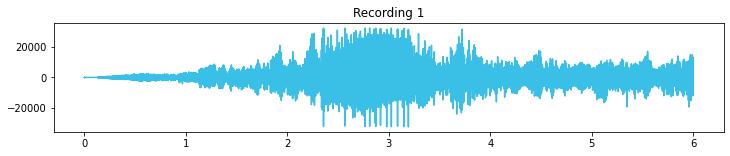

In [ ]:
import matplotlib.pyplot as plt

fs = mix_1_wave.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))

plt.figure(figsize=(12,2))
plt.title('Recording 1')
plt.plot(timing,signal_1, c="#3ABFE7")
plt.show();

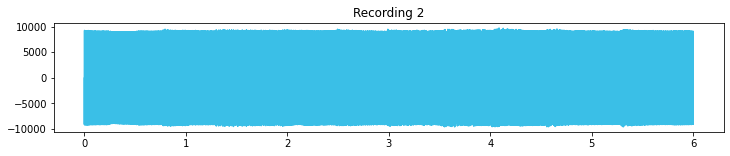

In [ ]:
import matplotlib.pyplot as plt

fs = mix_1_wave.getframerate()
timing = np.linspace(0, len(signal_2)/fs, num=len(signal_2))

plt.figure(figsize=(12,2))
plt.title('Recording 2')
plt.plot(timing,signal_2, c="#3ABFE7")
plt.show();

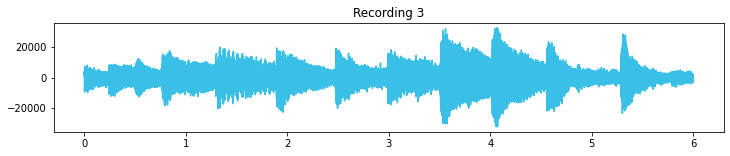

In [ ]:
import matplotlib.pyplot as plt

fs = mix_1_wave.getframerate()
timing = np.linspace(0, len(signal_3)/fs, num=len(signal_3))

plt.figure(figsize=(12,2))
plt.title('Recording 3')
plt.plot(timing,signal_3, c="#3ABFE7")
plt.show();

In [ ]:
IPython.display.Audio('signal_1.wav')

In [ ]:
IPython.display.Audio('signal_2.wav')


In [ ]:
IPython.display.Audio('signal_3.wav')


In [ ]:
import pandas as pd


3]

In [ ]:
def tanh(x, der = False):
    if(der == False):
        return np.tanh(x)
    else:
        return 1 - (np.tanh(x) * np.tanh(x))

def Normalise(x):
    x = np.array(x)
    return (x - np.mean(x))

def Whiten(x):
    cov = np.cov(x)    
    d, e = np.linalg.eigh(cov)    
    D = np.diag(d)    
    D_inv = np.sqrt(np.linalg.inv(D))    
    Whitex = np.dot(e, np.dot(D_inv, np.dot(e.T, x)))    
    return Whitex

def UpdateW(w, x):
    new_w = (x * tanh(np.dot(w.T, x))).mean(axis=1) - tanh((np.dot(w.T, x)).mean() * w, True)
    new_w /= np.sqrt((new_w ** 2).sum())    
    return new_w

def ICA(x, iter, tolerance=1e-3):
    x = Normalise(x)    
    x = Whiten(x)
        
    components_nr = x.shape[0]
    W = np.zeros((components_nr, components_nr), dtype=x.dtype)
    
    for i in range(components_nr):        
        w = np.random.rand(components_nr)  

        for j in range(iter):            
            w_new = UpdateW(w, x) 

            if i >= 1:
                w_new -= np.dot(np.dot(w_new, W[:i].T), W[:i])
            
            distance = np.abs(np.abs((w * w_new).sum()) - 1)            
            w = w_new
            
            if distance < tolerance:
                break
                
        W[i, :] = w
        
    S = np.dot(W, x)
    
    return S

X = (np.c_[signal_1, signal_2, signal_3]).T
S = ICA(X, 100)

4]

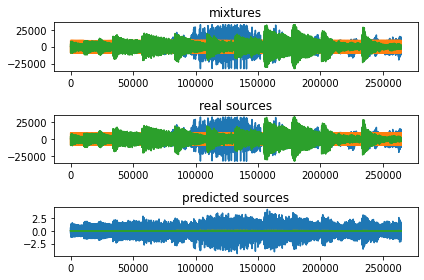

In [ ]:
def plot_mixture_sources_predictions(X, original_sources, S):
    fig = plt.figure()

    plt.subplot(3, 1, 1)
    for x in X:
        plt.plot(x)
    plt.title("mixtures")

    plt.subplot(3, 1, 2)
    for s in original_sources:
        plt.plot(s)
    plt.title("real sources")

    plt.subplot(3,1,3)
    for s in S:
        plt.plot(s)
    plt.title("predicted sources")
    
    fig.tight_layout()
    plt.show()

plot_mixture_sources_predictions(X, [signal_1, signal_2, signal_3], S)


5]

In [ ]:
from sklearn.decomposition import FastICA

fastICA = FastICA(n_components=3)#,random_state = 7)
X_transformed = fastICA.fit_transform(X.T)
type(X_transformed)

numpy.ndarray

In [ ]:
(fastICA.components_).shape

(3, 3)

6]

In [ ]:
signal_1 = X_transformed[:, 0]
signal_2 = X_transformed[:, 1]
signal_3 = X_transformed[:, 2]
signal_1

array([-0.00065476, -0.00071159, -0.00061453, ..., -0.00036966,
       -0.00038009, -0.00050851])

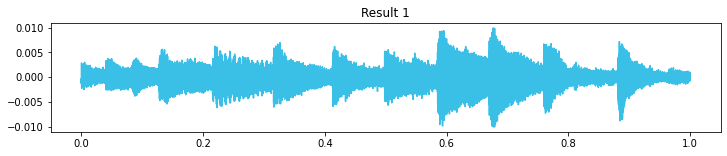

In [ ]:
fs = len(signal_1)
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))

plt.figure(figsize=(12,2))
plt.title('Result 1')
plt.plot(timing,signal_1, c="#3ABFE7")
plt.show();


In [ ]:
fs = len(signal_2)
timing = np.linspace(0, len(signal_2)/fs, num=len(signal_1))

plt.figure(figsize=(12,2))
plt.title('Result 2')
plt.plot(timing,signal_2, c="#3ABFE7")
plt.show();

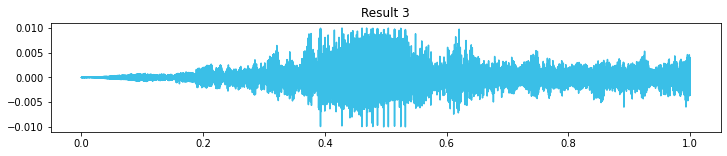

In [ ]:
fs = len(signal_3)
timing = np.linspace(0, len(signal_3)/fs, num=len(signal_1))

plt.figure(figsize=(12,2))
plt.title('Result 3')
plt.plot(timing,signal_3, c="#3ABFE7")
plt.show();

In [ ]:
from scipy.io import wavfile

rs1 = np.int16(signal_1 * 3276700)
wavfile.write("result_signal_1.wav", mix_1_wave.getframerate(), rs1)
IPython.display.Audio("result_signal_1.wav")

In [ ]:
rs2 = np.int16(signal_2 * 3276700)
wavfile.write("result_signal_2.wav", mix_2_wave.getframerate(), rs2)
IPython.display.Audio("result_signal_2.wav")

In [ ]:
rs3 = np.int16(signal_3 * 3276700)
wavfile.write("result_signal_3.wav", mix_3_wave.getframerate(), rs3)
IPython.display.Audio("result_signal_3.wav")

#Q2]

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
import pandas as pd
from sklearn import preprocessing
lbl_encoder = le = preprocessing.LabelEncoder()
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_train = df_train.dropna()
df_test = df_test.dropna()

df_train['Gender'] = lbl_encoder.fit_transform(df_train['Gender'])
df_train['Customer Type'] = lbl_encoder.fit_transform(df_train['Customer Type'])
df_train['Type of Travel'] = lbl_encoder.fit_transform(df_train['Type of Travel'])
df_train['Class'] = lbl_encoder.fit_transform(df_train['Class'])
df_train['satisfaction'] = lbl_encoder.fit_transform(df_train['satisfaction'])

df_train_x = df_train.iloc[:,1:-1]
df_train_y = df_train.iloc[:,-1]

df_test_x = df_test.iloc[:,1:-1]
df_test_y = df_test.iloc[:,-1]

df_train_x = df_train_x.drop(['id'], axis = 1)
df_test_x = df_test_x.drop(['id'], axis = 1)


df_train_x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            1              0   13               1      2              460   
1            1              1   25               0      0              235   
2            0              0   26               0      0             1142   
3            0              0   25               0      0              562   
4            1              0   61               0      0              214   
...        ...            ...  ...             ...    ...              ...   
103899       0              1   23               0      1              192   
103900       1              0   49               0      0             2347   
103901       1              1   30               0      0             1995   
103902       0              1   22               0      1             1000   
103903       1              0   27               0      0             1723   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
103899                      2                                  1   
103900                      4                                  4   
103901                      1                                  1   
103902                      1                                  1   
103903                      1                                  3   

        Ease of Online booking  Gate location  ...  Seat comfort  \
0                            3              1  ...             5   
1                            3              3  ...             1   
2                            2              2  ...             5   
3                            5              5  ...             2   
4                            3              3  ...             5   
...                        ...            ...  ...           ...   
103899                       2              3  ...             2   
103900                       4              4  ...             5   
103901                       1              3  ...             5   
103902                       1              5  ...             1   
103903                       3              3  ...             1   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
103899                       2                 3                 1   
103900                       5                 5                 5   
103901                       4                 3                 2   
103902                       1                 4                 5   
103903                       1                 1                 1   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
103899                 4                2                 3     

In [ ]:
dt = DecisionTreeClassifier()
sfs = SFS(dt, k_features=10,forward = True,scoring = 'accuracy',floating = False)
sfs.fit(df_train_x, df_train_y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(), k_features=10,
                          scoring='accuracy')

c]

In [ ]:
x_train = df_train_x
y_train = df_train_y

sfs.subsets_[10]

{'avg_score': 0.9507017852520827,
 'cv_scores': array([0.94990106, 0.9505285 , 0.94888749, 0.95274868, 0.95144319]),
 'feature_idx': (1, 3, 4, 6, 9, 11, 12, 13, 16, 18),
 'feature_names': ('Customer Type',
  'Type of Travel',
  'Class',
  'Inflight wifi service',
  'Gate location',
  'Online boarding',
  'Seat comfort',
  'Inflight entertainment',
  'Baggage handling',
  'Inflight service')}

In [ ]:
sfs.k_feature_names_


('Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Gate location',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'Baggage handling',
 'Inflight service')

d]

In [ ]:
sfs1 = SFS(dt, k_features=10, forward = True, scoring = 'accuracy', floating = False, cv = 4)
sfs1.fit(df_train_x,df_train_y)

sfs2 = SFS(dt, k_features=10, forward = False, scoring = 'accuracy', floating = False, cv = 4)
sfs2.fit(df_train_x.values, df_train_y.values)

sfs3 = SFS(dt, k_features=10, forward = True, scoring = 'accuracy', floating = True, cv = 4)
sfs3.fit(df_train_x.values,df_train_y.values)

sfs4 = SFS(dt, k_features=10, forward = False, scoring = 'accuracy', floating = True, cv = 4)
sfs4.fit(df_train_x.values,df_train_y.values)

SequentialFeatureSelector(cv=4, estimator=DecisionTreeClassifier(),
                          floating=True, forward=False, k_features=10,
                          scoring='accuracy')

In [ ]:
print(sfs1.subsets_[10])
print("---------------------________________________-------------------------")
print(sfs2.subsets_[10])
print("---------------------________________________-------------------------")
print(sfs3.subsets_[10])
print("---------------------________________________-------------------------")
print(sfs4.subsets_[10])
print("---------------------________________________-------------------------")


{'feature_idx': (1, 3, 4, 6, 9, 11, 12, 13, 16, 18), 'cv_scores': array([0.94891695, 0.94984362, 0.9498803 , 0.95111592]), 'avg_score': 0.9499391964575459, 'feature_names': ('Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Gate location', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Baggage handling', 'Inflight service')}
---------------------________________________-------------------------
{'feature_idx': (1, 3, 4, 6, 11, 12, 13, 16, 18, 19), 'cv_scores': array([0.95115642, 0.95115642, 0.9507684 , 0.95300795]), 'avg_score': 0.9515222959993955, 'feature_names': ('1', '3', '4', '6', '11', '12', '13', '16', '18', '19')}
---------------------________________________-------------------------
{'feature_idx': (1, 3, 4, 6, 11, 12, 13, 16, 18, 19), 'cv_scores': array([0.95088613, 0.95127225, 0.95042088, 0.95296934]), 'avg_score': 0.9513871519192167, 'feature_names': ('1', '3', '4', '6', '11', '12', '13', '16', '18', '19')}
---------------------___________

e]

In [ ]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T


feature_idx  \
1                                 (11,)   
2                               (3, 11)   
3                            (3, 6, 11)   
4                         (3, 6, 9, 11)   
5                     (3, 6, 9, 11, 16)   
6                  (1, 3, 6, 9, 11, 16)   
7               (1, 3, 4, 6, 9, 11, 16)   
8           (1, 3, 4, 6, 9, 11, 16, 18)   
9       (1, 3, 4, 6, 9, 11, 12, 16, 18)   
10  (1, 3, 4, 6, 9, 11, 12, 13, 16, 18)   

                                            cv_scores avg_score  \
1   [0.7894203388194411, 0.7927988802548386, 0.790...  0.790335   
2   [0.8480621651624113, 0.8520198851295911, 0.847...  0.849615   
3   [0.8920314687002269, 0.8929967662531976, 0.889...  0.891249   
4   [0.9193976543269463, 0.923065785028235, 0.9190...  0.921714   
5   [0.927216564506009, 0.9304020464308123, 0.9275...  0.929204   
6   [0.9388484000193059, 0.9442540663159419, 0.939...  0.941425   
7   [0.9473430184854481, 0.9485496404266616, 0.946...  0.948665   
8   [0.9503837057773059, 0.9515420628408707, 0.948...   0.95132   
9   [0.9508663545537912, 0.951928181862059, 0.9509...  0.951908   
10  [0.9499010570008205, 0.9505285004102515, 0.948...  0.950702   

                                        feature_names  ci_bound   std_dev  \
1                                  (Online boarding,)  0.002989  0.002325   
2                   (Type of Travel, Online boarding)  0.002356  0.001833   
3   (Type of Travel, Inflight wifi service, Online...   0.00233  0.001813   
4   (Type of Travel, Inflight wifi service, Gate l...  0.002741  0.002133   
5   (Type of Travel, Inflight wifi service, Gate l...  0.002209  0.001719   
6   (Customer Type, Type of Travel, Inflight wifi ...  0.002715  0.002112   
7   (Customer Type, Type of Travel, Class, Infligh...  0.002313  0.001799   
8   (Customer Type, Type of Travel, Class, Infligh...  0.002127  0.001655   
9   (Customer Type, Type of Travel, Class, Infligh...  0.001264  0.000983   
10  (Customer Type, Type of Travel, Class, Infligh...  0.001696  0.001319   

     std_err  
1   0.001163  
2   0.000917  
3   0.000906  
4   0.001066  
5   0.000859  
6   0.001056  
7     0.0009  
8   0.000827  
9   0.000492  
10   0.00066

In [ ]:
print(sfs1.k_score_)
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T


0.9499391964575459


feature_idx  \
1                                 (11,)   
2                               (3, 11)   
3                            (3, 6, 11)   
4                         (3, 6, 9, 11)   
5                      (1, 3, 6, 9, 11)   
6                  (1, 3, 6, 9, 11, 16)   
7               (1, 3, 4, 6, 9, 11, 16)   
8           (1, 3, 4, 6, 9, 11, 16, 18)   
9       (1, 3, 4, 6, 9, 11, 12, 16, 18)   
10  (1, 3, 4, 6, 9, 11, 12, 13, 16, 18)   

                                            cv_scores avg_score  \
1   [0.7897602224024094, 0.7918066334607514, 0.793...  0.790335   
2   [0.8483339125062743, 0.8511911656820726, 0.850...  0.849615   
3   [0.8914629908490675, 0.8920421637901077, 0.892...  0.891249   
4   [0.9192246804895942, 0.9228927757828488, 0.922...  0.921733   
5   [0.9277578284875864, 0.9284914475462374, 0.929...  0.928828   
6   [0.9393412873083903, 0.9424688211900073, 0.939...  0.941271   
7   [0.9464071971890806, 0.9486852774238388, 0.948...  0.948269   
8   [0.9497664002471138, 0.9505000193057647, 0.950...   0.95074   
9   [0.9489941696590602, 0.9508475230703888, 0.951...  0.950943   
10  [0.9489169466002548, 0.9498436233059191, 0.949...  0.949939   

                                        feature_names  ci_bound   std_dev  \
1                                  (Online boarding,)  0.004065  0.002536   
2                   (Type of Travel, Online boarding)  0.002085    0.0013   
3   (Type of Travel, Inflight wifi service, Online...  0.002214  0.001381   
4   (Type of Travel, Inflight wifi service, Gate l...  0.002346  0.001463   
5   (Customer Type, Type of Travel, Inflight wifi ...  0.001202   0.00075   
6   (Customer Type, Type of Travel, Inflight wifi ...  0.002893  0.001805   
7   (Customer Type, Type of Travel, Class, Infligh...  0.001789  0.001116   
8   (Customer Type, Type of Travel, Class, Infligh...  0.001202   0.00075   
9   (Customer Type, Type of Travel, Class, Infligh...  0.002005  0.001251   
10  (Customer Type, Type of Travel, Class, Infligh...  0.001253  0.000781   

     std_err  
1   0.001464  
2   0.000751  
3   0.000797  
4   0.000845  
5   0.000433  
6   0.001042  
7   0.000644  
8   0.000433  
9   0.000722  
10  0.000451

In [ ]:
print(sfs2.k_score_)
pd.DataFrame.from_dict(sfs2.get_metric_dict()).T

0.9515222959993955


feature_idx  \
22  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
21  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...   
20  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...   
19  (0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15...   
18  (1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 1...   
17  (1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 16, ...   
16  (1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...   
15  (1, 2, 3, 4, 6, 9, 11, 12, 13, 15, 16, 17, 18,...   
14  (1, 2, 3, 4, 6, 9, 11, 12, 13, 15, 16, 17, 18,...   
13    (1, 3, 4, 6, 9, 11, 12, 13, 15, 16, 17, 18, 19)   
12        (1, 3, 4, 6, 9, 11, 12, 13, 16, 17, 18, 19)   
11           (1, 3, 4, 6, 11, 12, 13, 16, 17, 18, 19)   
10               (1, 3, 4, 6, 11, 12, 13, 16, 18, 19)   

                                            cv_scores avg_score  \
22  [0.9437430016602958, 0.9457894127186378, 0.946...  0.945808   
21  [0.9443607861307386, 0.9467547009537047, 0.945...  0.946165   
20  [0.9446310668365574, 0.9457508011892352, 0.946...  0.946155   
19  [0.944438009189544, 0.9459824703656512, 0.9469...  0.946203   
18  [0.945403297424611, 0.9471022047183288, 0.9467...   0.94686   
17  [0.9440518938955172, 0.9477586007181744, 0.945...   0.94631   
16  [0.9455963550716244, 0.9477199891887718, 0.944...  0.946377   
15  [0.9450171821305842, 0.9462527510714699, 0.945...  0.946165   
14  [0.9439746708367118, 0.9472952623653423, 0.944...  0.945537   
13  [0.9447469014247655, 0.9437043901308931, 0.945...  0.945325   
12  [0.9471022047183288, 0.9471794277771343, 0.946...  0.947709   
11  [0.9491100042472682, 0.9497664002471138, 0.949...  0.949669   
10  [0.9511564153056102, 0.9511564153056102, 0.950...  0.951522   

                                        feature_names  ci_bound   std_dev  \
22  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  0.002117  0.001321   
21  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...  0.002165  0.001351   
20  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...  0.002009  0.001254   
19  (0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15...  0.001839  0.001147   
18  (1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 1...  0.001591  0.000992   
17  (1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 16, ...   0.00268  0.001672   
16  (1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...   0.00269  0.001678   
15  (1, 2, 3, 4, 6, 9, 11, 12, 13, 15, 16, 17, 18,...  0.001764  0.001101   
14  (1, 2, 3, 4, 6, 9, 11, 12, 13, 15, 16, 17, 18,...  0.002014  0.001256   
13    (1, 3, 4, 6, 9, 11, 12, 13, 15, 16, 17, 18, 19)  0.002451  0.001529   
12        (1, 3, 4, 6, 9, 11, 12, 13, 16, 17, 18, 19)   0.00219  0.001366   
11           (1, 3, 4, 6, 11, 12, 13, 16, 17, 18, 19)   0.00079  0.000493   
10               (1, 3, 4, 6, 11, 12, 13, 16, 18, 19)  0.001398  0.000872   

     std_err  
22  0.000762  
21   0.00078  
20  0.000724  
19  0.000662  
18  0.000573  
17  0.000965  
16  0.000969  
15  0.000635  
14  0.000725  
13  0.000883  
12  0.000789  
11  0.000285  
10  0.000504

In [ ]:
print(sfs3.k_score_)
pd.DataFrame.from_dict(sfs3.get_metric_dict()).T

0.9513871519192167


feature_idx  \
1                                  (11,)   
2                                (3, 11)   
3                             (3, 6, 11)   
4                          (3, 6, 9, 11)   
5                       (1, 3, 6, 9, 11)   
6                   (1, 3, 6, 9, 11, 16)   
7                (1, 3, 4, 6, 9, 11, 16)   
8            (1, 3, 4, 6, 9, 11, 16, 18)   
9       (1, 3, 4, 6, 11, 12, 13, 16, 18)   
10  (1, 3, 4, 6, 11, 12, 13, 16, 18, 19)   

                                            cv_scores avg_score  \
1   [0.7897602224024094, 0.7918066334607514, 0.793...  0.790335   
2   [0.8483339125062743, 0.8511911656820726, 0.850...  0.849615   
3   [0.8914629908490675, 0.8920421637901077, 0.892...  0.891249   
4   [0.9192246804895942, 0.9228927757828488, 0.922...  0.921733   
5   [0.9277578284875864, 0.9284914475462374, 0.929...  0.928828   
6   [0.9393412873083903, 0.9424688211900073, 0.939...  0.941271   
7   [0.9462913626008727, 0.9488011120120468, 0.948...  0.948269   
8   [0.9497277887177111, 0.9502683501293486, 0.950...  0.950634   
9   [0.9503069616587513, 0.9510019691879995, 0.949...  0.950982   
10  [0.9508861345997915, 0.9512722498938183, 0.950...  0.951387   

                           feature_names  ci_bound   std_dev   std_err  
1                                  (11,)  0.004065  0.002536  0.001464  
2                                (3, 11)  0.002085    0.0013  0.000751  
3                             (3, 6, 11)  0.002214  0.001381  0.000797  
4                          (3, 6, 9, 11)  0.002346  0.001463  0.000845  
5                       (1, 3, 6, 9, 11)  0.001202   0.00075  0.000433  
6                   (1, 3, 6, 9, 11, 16)  0.002893  0.001805  0.001042  
7                (1, 3, 4, 6, 9, 11, 16)  0.001886  0.001177  0.000679  
8            (1, 3, 4, 6, 9, 11, 16, 18)  0.001187  0.000741  0.000428  
9       (1, 3, 4, 6, 11, 12, 13, 16, 18)  0.001626  0.001015  0.000586  
10  (1, 3, 4, 6, 11, 12, 13, 16, 18, 19)  0.001542  0.000962  0.000555

In [ ]:
print(sfs4.k_score_)
pd.DataFrame.from_dict(sfs4.get_metric_dict()).T

0.9495916871020177


feature_idx  \
22  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
21  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...   
20  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...   
19  (0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15...   
18  (1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 1...   
17  (1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 16, ...   
16  (1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...   
15  (1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...   
14  (1, 2, 3, 4, 6, 9, 11, 12, 14, 15, 16, 17, 18,...   
13      (1, 2, 3, 4, 6, 8, 9, 11, 12, 16, 17, 18, 20)   
12          (1, 2, 3, 4, 6, 8, 9, 11, 12, 16, 17, 18)   
11             (1, 3, 4, 6, 8, 9, 11, 12, 16, 17, 18)   
10                 (1, 3, 4, 6, 8, 9, 11, 12, 16, 18)   

                                            cv_scores avg_score  \
22  [0.9432024402486583, 0.9463299741302753, 0.946...   0.94546   
21  [0.9436657786014904, 0.9462141395420672, 0.945...  0.945856   
20  [0.9439360593073092, 0.9455963550716244, 0.946...  0.945972   
19  [0.94466967836596, 0.9472952623653423, 0.94675...  0.946609   
18  [0.9451330167187922, 0.9459052473068458, 0.946...  0.946213   
17  [0.9449013475423762, 0.948183327541604, 0.9451...   0.94657   
16  [0.9466774778948994, 0.947333873894745, 0.9445...  0.946812   
15  [0.9447855129541681, 0.9480674929533959, 0.944...  0.946319   
14  [0.9438588362485038, 0.9461755280126646, 0.946...  0.945856   
13  [0.9467160894243021, 0.9448241244835708, 0.947...  0.945952   
12  [0.9456735781304297, 0.9456349666010271, 0.942...  0.945103   
11  [0.947449708482953, 0.9462913626008727, 0.9474...  0.947536   
10  [0.9480288814239932, 0.9499208463647245, 0.949...  0.949592   

                                        feature_names  ci_bound   std_dev  \
22  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  0.002094  0.001306   
21  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...  0.002478  0.001546   
20  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...  0.002453   0.00153   
19  (0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15...  0.001877  0.001171   
18  (1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 1...  0.001203   0.00075   
17  (1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 16, ...  0.002496  0.001557   
16  (1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...  0.002391  0.001492   
15  (1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...  0.003117  0.001944   
14  (1, 2, 3, 4, 6, 9, 11, 12, 14, 15, 16, 17, 18,...  0.001957  0.001221   
13      (1, 2, 3, 4, 6, 8, 9, 11, 12, 16, 17, 18, 20)  0.001622  0.001012   
12          (1, 2, 3, 4, 6, 8, 9, 11, 12, 16, 17, 18)  0.002239  0.001397   
11             (1, 3, 4, 6, 8, 9, 11, 12, 16, 17, 18)   0.00154  0.000961   
10                 (1, 3, 4, 6, 8, 9, 11, 12, 16, 18)  0.001478  0.000922   

     std_err  
22  0.000754  
21  0.000893  
20  0.000883  
19  0.000676  
18  0.000433  
17  0.000899  
16  0.000861  
15  0.001122  
14  0.000705  
13  0.000584  
12  0.000806  
11  0.000555  
10  0.000532

f]

Text(0.5, 1.0, 'Sequential Forward Selection')

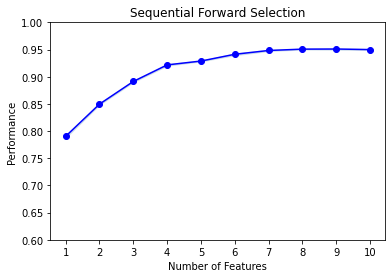

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.ylim([0.6, 1])
plt.title('Sequential Forward Selection')

Text(0.5, 1.0, 'Sequential Backward Selection')

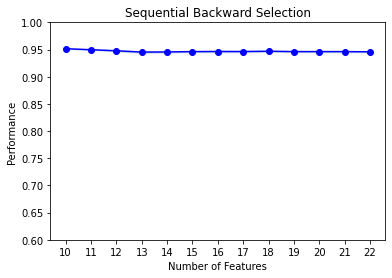

In [ ]:
fig1 = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')
plt.ylim([0.6, 1])
plt.title('Sequential Backward Selection')

Text(0.5, 1.0, 'Sequential Forward Floating Selection')

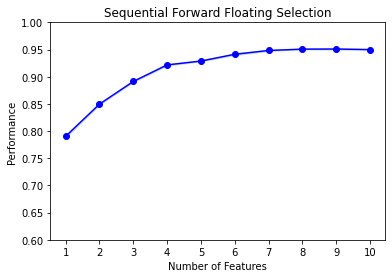

In [ ]:
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.ylim([0.6, 1])
plt.title('Sequential Forward Floating Selection')

Text(0.5, 1.0, 'Sequential Backward Floating Selection')

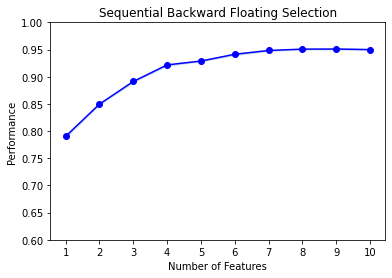

In [ ]:
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.ylim([0.6, 1])
plt.title('Sequential Backward Floating Selection')

g]

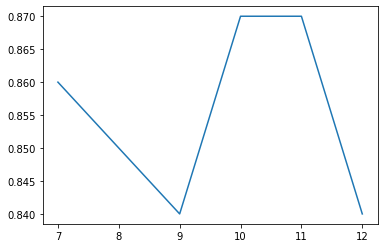

In [ ]:
cvScores = []
for i in range(7, 13):
    temp_sfs = SFS(dt, k_features = i, forward = True, scoring = 'accuracy', floating = False)
    temp_sfs.fit(df_train_x.head(100), df_train_y.head(100))
    cvScores.append(temp_sfs.k_score_)

plt.plot(range(7, 13), cvScores)